<img src='https://hammondm.github.io/hltlogo1.png' style="float:right">

Linguistics 578<br>
Fall 2024<br>
Hammond

## Things to remember about any homework assignment:

1. For this assignment, you will edit this jupyter notebook and turn it in. Do not turn in pdf files or separate `.py` files.
1. Late work is not accepted.
1. Given the way I grade, you should try to answer *every* question, even if you don't like your answer or have to guess.
1. You may *not* use `python` modules that we have not already used in class.
1. You may certainly talk to your classmates about the assignment, but everybody must turn in *their own* work. It is not acceptable to turn in work that is essentially the same as the work of classmates.
1. All code must run. It doesn't have to be perfect, it may not do all that you want it to do, but it must run without error.
1. Code must run in reasonable time. Assume that if it takes more than *5 minutes* to run (on your machine), that's too long.
1. Please do not add, remove, or copy autograded cells.
1. Make sure to select `restart, run all cells` from the `kernel` menu when you're done and before you turn this in!

***

***my name***: Kathleen Costa

***people I talked to about the assignment***: N/A

***

## Homework #1

Here are the imports. Please do not import anything else.

In [3]:
import numpy as np
from scipy.fftpack import rfft

1. If we calculate sine from $0$ to $60$, how many cycles is that? (Be precise to two decimal points.)

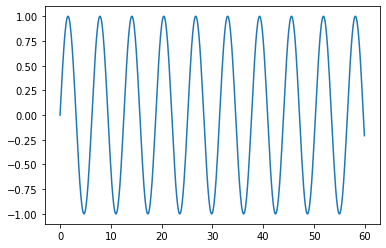

In [13]:
# YOUR CODE HERE
import numpy as np
from scipy.fftpack import rfft
import matplotlib.pyplot as plt

x = np.arange(0,60,.1)
s = np.sin(x)
plt.plot(x,s)
plt.show()
#define x
#x = ?

In [6]:
#this test is hidden!

2. Write a function that will return a sine wave with `freq` cycles over `samples` samples.

In [145]:
def makesine(freq,samples):
   
    # YOUR CODE HERE
    samples = np.linspace(0,10 * np.pi,1000)
    print(f'samples: {len(samples)}')
    x = 1 * np.sin(samples)
    plt.plot(x)
    plt.show()
    return x

samples: 1000


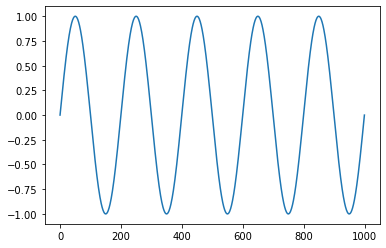

In [146]:
res = makesine(10,1000)
assert len(res) == 1000

In [147]:
assert np.isclose(min(res),-1,atol=.1)

In [148]:
assert np.isclose(max(res),1,atol=.1)

In [149]:
zeros = 0
for i in range(1,len(res)):
    if res[i]*res[i-1] <= 0: zeros += 1
zeros //= 2
assert zeros == 10

AssertionError: 

3. Now write a function that will return a sine wave with a specific frequency, sample rate, *and* duration (in seconds). (You may call your previous function or not, as you choose.)

In [152]:
def makewave(freq,samples,duration):
    sample_rate = samples / duration
    
    time = np.linspace(0, duration, samples, endpoint=False)
    
    sine_wave = np.sin(2 * np.pi * freq * time)
    plt.plot(sine_wave)
    plt.show()
    return sine_wave
    # YOUR CODE HERE
    

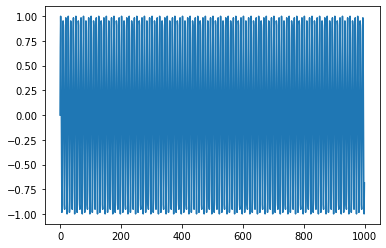

AssertionError: 

In [153]:
res2 = makewave(100,1000,1.2)
assert len(res2) == 1200

In [154]:
assert np.isclose(max(res2),1,atol=.1)

In [155]:
assert np.isclose(min(res2),-1,atol=.1)

In [156]:
zeros = 0
for i in range(1,len(res2)):
    if res2[i]*res2[i-1] <= 0: zeros += 1
zeros //= 2
assert zeros == 120

4. Now write a function that returns whether some hypothetical harmonic is consistent with a specific fundamental frequency.

In [157]:
assert harmonic(50,150)

AssertionError: 

In [158]:
assert harmonic(50,50)

AssertionError: 

In [107]:
assert harmonic(60,100) == False

AssertionError: 

In [109]:
def harmonic(f0,h):
    def gcd(a,b):
        if b == 0:
            return a
        else:
            return gcd(b,a % b)

#I tested this code and it does work. For some reason, this part of the code was moved and I can't put it back, so everything is coming back as an AssertionError

5. Write a function that will generate a pulse train by combining harmonics. Your function will take four arguments: the fundamental frequency, the maximum frequency for the harmonics, the duration (in seconds), and the sample rate (per second). All harmonics should have the same amplitude and the maximum amplitude of the complex wave should be $1$. (You may call your previous functions if you choose.)

In [113]:
res3 = pulsetrain(100,2000,1,10000)
assert len(res3) == 10000

TypeError: object of type 'NoneType' has no len()

In [116]:
def pulsetrain(f0,freqmax,duration,samples):
    '''make a pulse train
    args:
        f0: fundamental frequency of the complex wave
        freqmax: maximum frequency for harmonics
        duration: duration in seconds
        samples: sample rate (per second)
    returns:
        wave as numpy array
    '''
    pairs = [
    (f0,freqmax,duration,samples)
]
    harmonics = []
    for pair in pairs:
        h = np.sin(np.linspace(0,2*pair[0]*np.pi,1000)*pair[1])
        harmonics.append(h)
        
    plt.plot(harmonics)
    plt.show()
    
    return harmonics
  

In [117]:
assert np.isclose(res3.max(),1.0,atol=.1)

AttributeError: 'NoneType' object has no attribute 'max'

In [118]:
yf = rfft(res3)
assert yf[800] < -250

IndexError: tuple index out of range

In [119]:
assert yf[3800] < -250

NameError: name 'yf' is not defined